In [17]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from load_helpers import load
from metric_helpers import (bin_data, binned_positive_label_prob, apply_to_all, apply_to_merged_splits,
                            meta_confidence_and_accuracy, tpr_diff_and_accuracy)

In [18]:
dataset_name = "adult"
sensitives = ["race"]
split_ids = [0, 1, 2]
algo_names = ["UGP_dem_par_in_False", "UGP_dem_par_in_True", "UGP_in_False", "UGP_in_True",
              "ULR_dem_par_in_False", "ULR_dem_par_in_True", "ULR_in_False", "ULR_in_True"]
dataset, results = load(dataset_name, sensitives, split_ids, algo_names)

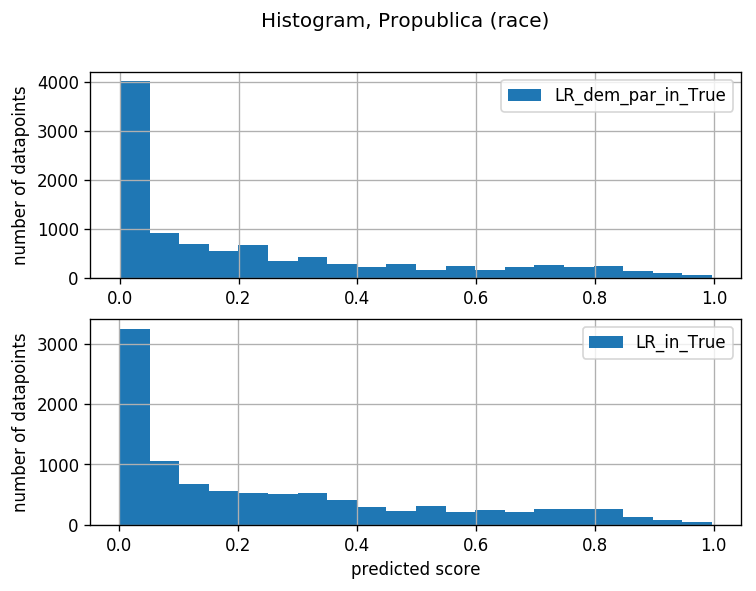

In [19]:
fig, plots = plt.subplots(2, 1, figsize=(7, 5), dpi=120)
#plot.plot(results_propublica['UGP_eq_opp_in_False']['race'][0]['pred_mean'], propublica['race'][0]['ytest'], 'o')
plots[0].hist(results['ULR_dem_par_in_True']['race'][0]['pred_mean'], bins=20, label='LR_dem_par_in_True')
plots[1].hist(results['ULR_in_True']['race'][0]['pred_mean'], bins=20, label='LR_in_True')
plots[1].set_xlabel('predicted score')
for plot in plots:
    plot.set_ylabel('number of datapoints')
    #plot.set_xlim((.47, .54))
    plot.grid()
    plot.legend()
fig.suptitle('Histogram, Propublica (race)')
fig.savefig('histogram_adult_race_lr.svg')

In [20]:
conf_acc = apply_to_merged_splits(meta_confidence_and_accuracy(15), results, dataset)

In [21]:
conf_acc_s0 = apply_to_merged_splits(meta_confidence_and_accuracy(15, s=0), results, dataset)
conf_acc_s1 = apply_to_merged_splits(meta_confidence_and_accuracy(15, s=1), results, dataset)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
confidence, accuracy = conf_acc['ULR_dem_par_in_False']['race']
#scale = max(confidence.max() - 0.5, 0.5 - confidence.min())
#confidence = 0.5 * (confidence - 0.5) / scale + 0.5

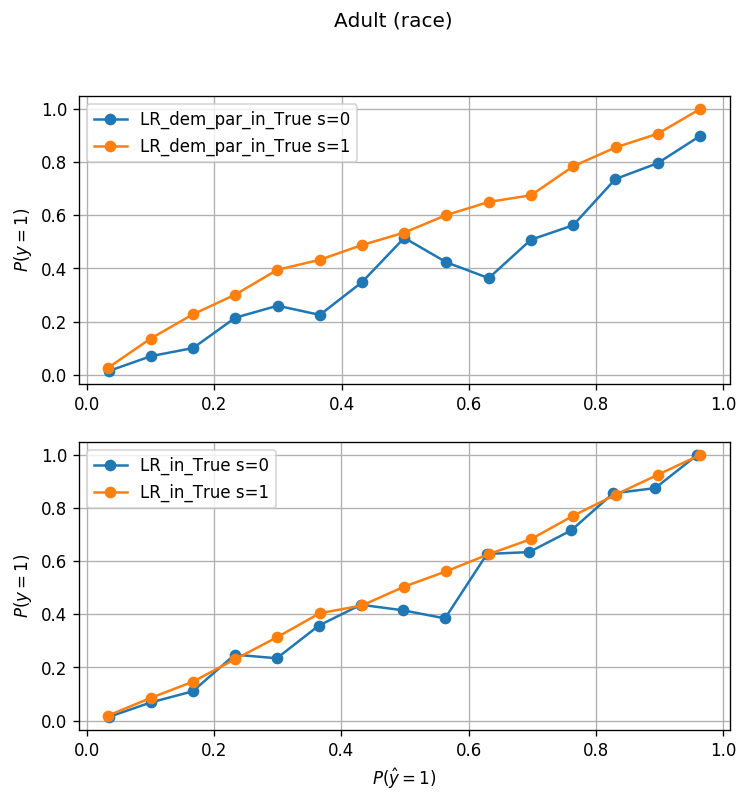

In [23]:
fig, plots = plt.subplots(2, 1, figsize=(7, 7), dpi=120)
plots[0].plot(*conf_acc_s0['ULR_dem_par_in_True']['race'], 'o-', label='LR_dem_par_in_True s=0')
plots[0].plot(*conf_acc_s1['ULR_dem_par_in_True']['race'], 'o-', label='LR_dem_par_in_True s=1')
#plot.plot(*conf_acc['UGP_eq_opp_in_False']['race'][1], 'o-', label='UGP_eq_opp_in_False')
plots[1].plot(*conf_acc_s0['ULR_in_True']['race'], 'o-', label='LR_in_True s=0')
plots[1].plot(*conf_acc_s1['ULR_in_True']['race'], 'o-', label='LR_in_True s=1')
#plot.plot(*conf_acc['UGP_in_False']['race'][1], 'o-', label='UGP_in_False', color="red")
#plot.plot([0.48, 0.52], [0.48, 0.52])
fig.suptitle('Adult (race)')
plots[1].set_xlabel('$P(\\hat{y}=1)$')
for plot in plots:
    plot.set_ylabel('$P(y=1)$')
    plot.grid()
    plot.legend()
    #plot.set_xlim((.47, .54))
fig.savefig('confidence_adult_race_by_s_lr.svg')

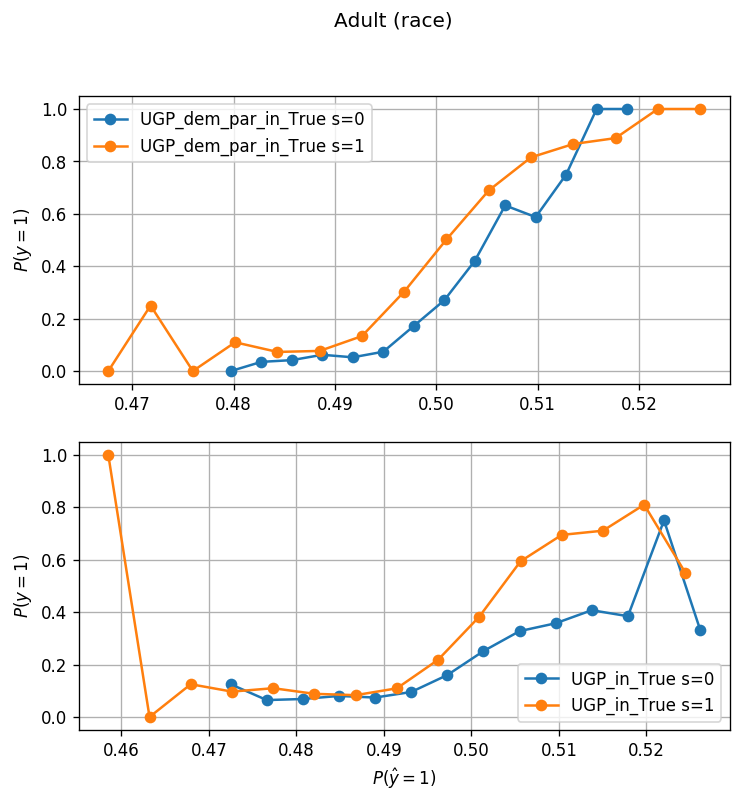

In [22]:
fig, plots = plt.subplots(2, 1, figsize=(7, 7), dpi=120)
plots[0].plot(*conf_acc_s0['UGP_dem_par_in_True']['race'], 'o-', label='UGP_dem_par_in_True s=0')
plots[0].plot(*conf_acc_s1['UGP_dem_par_in_True']['race'], 'o-', label='UGP_dem_par_in_True s=1')
#plot.plot(*conf_acc['UGP_eq_opp_in_False']['race'][1], 'o-', label='UGP_eq_opp_in_False')
plots[1].plot(*conf_acc_s0['UGP_in_True']['race'], 'o-', label='UGP_in_True s=0')
plots[1].plot(*conf_acc_s1['UGP_in_True']['race'], 'o-', label='UGP_in_True s=1')
#plot.plot(*conf_acc['UGP_in_False']['race'][1], 'o-', label='UGP_in_False', color="red")
#plot.plot([0.48, 0.52], [0.48, 0.52])
fig.suptitle('Adult (race)')
plots[1].set_xlabel('$P(\\hat{y}=1)$')
for plot in plots:
    plot.set_ylabel('$P(y=1)$')
    plot.grid()
    plot.legend()
    #plot.set_xlim((.47, .54))
fig.savefig('confidence_adult_race_by_s.svg')

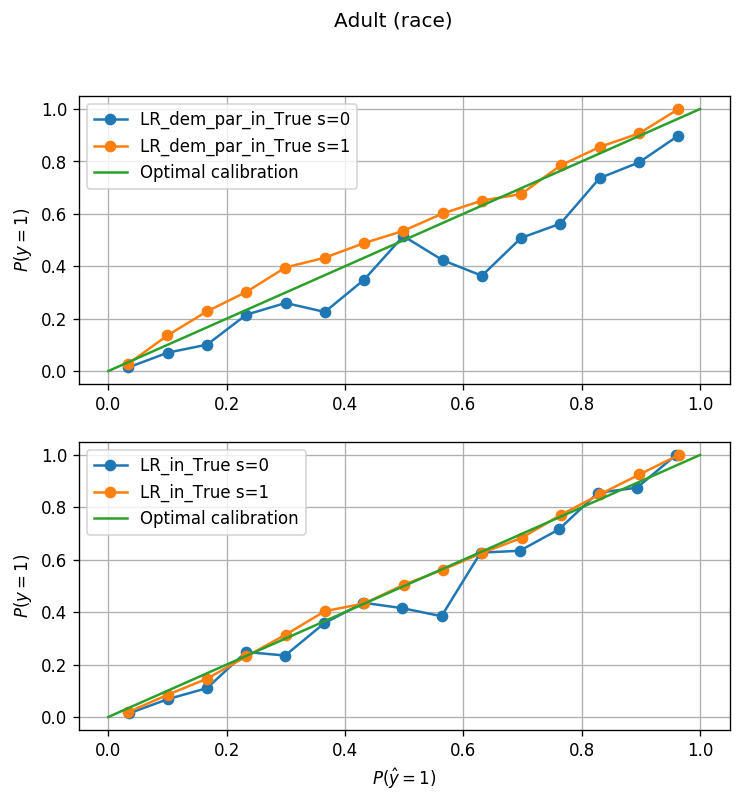

In [12]:
for plot in plots:
    plot.plot([0, 1], [0, 1], label='Optimal calibration')
    plot.legend()
fig.savefig('confidence_adult_race_with_optimal_scaled_lr.svg')
fig

In [24]:
def di_and_accuracy(result, dataset):
    """Compute TPR difference and accuracy"""
    # gather data
    scores = result['pred_mean']
    labels = dataset['ytest']
    sensitive = dataset['stest']
    # P(yhat=1|y=1, s=0)
    pr_s0 = np.mean(scores[sensitive == 0] > 0.5)
    # P(yhat=1|y=1, s=1)
    pr_s1 = np.mean(scores[sensitive == 1] > 0.5)
    accuracy = np.mean((scores > 0.5).astype(np.int) == labels)
    return pr_s0 / pr_s1, accuracy
apply_to_all(di_and_accuracy, results, dataset)

{'UGP_dem_par_in_False': {'race': {0: (0.6387403735684679, 0.8164097463948284),
   1: (0.6258560094282046, 0.8144206862257584),
   2: (0.6588656431155128, 0.8158130283441074)}},
 'UGP_dem_par_in_True': {'race': {0: (0.9763298399093142, 0.8116360019890602),
   1: (0.9696374577261464, 0.8111387369467926),
   2: (0.9604315561762371, 0.8104425658876181)}},
 'UGP_in_False': {'race': {0: (0.5859737603970405, 0.8201889607160616),
   1: (0.8063779196428289, 0.783490800596718),
   2: (0.8452775871272782, 0.7306812531079065)}},
 'UGP_in_True': {'race': {0: (0.6914400839995299, 0.8113376429636997),
   1: (0.9463734351316454, 0.774042764793635),
   2: (1.0558407977597448, 0.7077076081551467)}},
 'ULR_dem_par_in_False': {'race': {0: (0.6059693759823065, 0.8306315266036798),
   1: (0.5696474709115816, 0.8316260566882148),
   2: (0.6260738187993208, 0.8290402784684237)}},
 'ULR_dem_par_in_True': {'race': {0: (0.7921454358861583, 0.8308304326205868),
   1: (0.7960516219044297, 0.8295375435106912),
   